In [1]:
import pandas
from ots_eval.stability_evaluation.close import CLOSE
import numpy as np
import csv
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6
import seaborn as sns

%matplotlib inline

In [2]:
data1 = pandas.read_csv("datasets/generated_1d_data.csv")
data1.head()

,object_id,time,feature1
0,1,1,0.800000
1,2,1,0.808568
2,3,1,0.791467
3,4,1,0.809371
4,5,1,0.764732


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   object_id  232 non-null    int64  
 1   time       232 non-null    int64  
 2   feature1   232 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


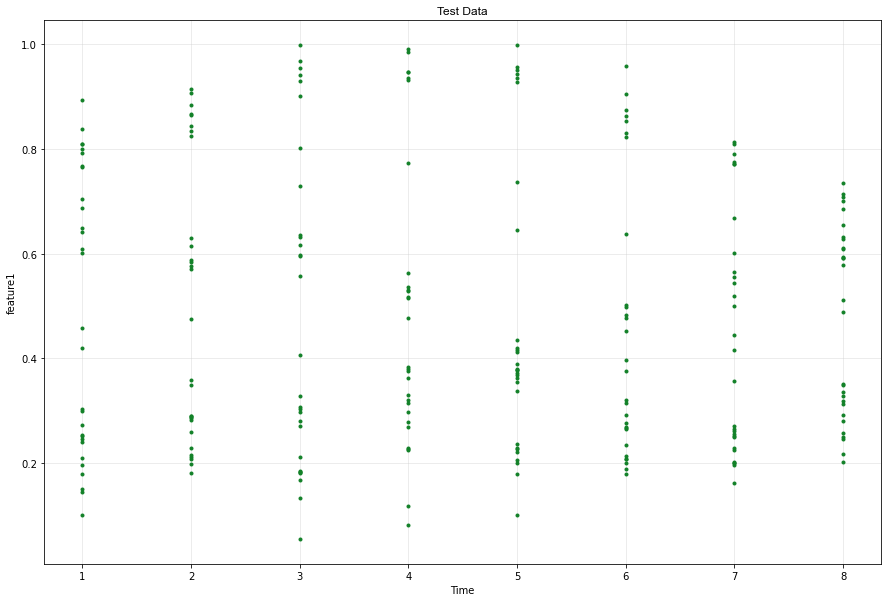

In [4]:
plt.figure(figsize=(15,10))
_ = plt.plot(data1['time'], data1['feature1'],
            marker='.', linewidth=0, color='#128128')
_ = plt.grid(which='major', color='#cccccc', alpha=0.45)
_ = plt.title('Test Data', family='Arial', fontsize=12)
_ = plt.xlabel('Time')
_ = plt.ylabel('feature1')
_ = plt.show()

In [ ]:
sns.pairplot(data1)

In [ ]:
dbscan_data = data1[['time', 'feature1']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data

In [ ]:
dbscan_data_scaler = StandardScaler()
dbscan_data = dbscan_data_scaler.fit_transform(dbscan_data)
dbscan_data

In [ ]:
model = DBSCAN(eps=0.25, min_samples=3).fit(dbscan_data)
model

In [ ]:
outliers_df = data1[model.labels_ == -1]
clusters_df = data1[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

clusters = Counter(model.labels_)
print(clusters)
print(data1[model.labels_ == -1].head())
print('Number of clusters = {}' .format(len(clusters)-1))

In [ ]:
model.labels_

In [ ]:
clusters_df

In [ ]:
outliers_df

In [ ]:
df = pandas.read_csv('datasets/generated_1d_data.csv')
df_list = df.values.tolist()
print(df_list)

In [ ]:
t1.append(pd.DataFrame([[7,8,9]], columns=["hans","peter","james"])) #beispiel append fuer df

In [5]:
import warnings
warnings.filterwarnings('ignore')

from pandas.core.common import flatten
import random
import statistics
import pandas as pd
import numpy as np
from plotnine import * 
from ots_eval.stability_evaluation.close import CLOSE

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from matplotlib import pyplot as plt

%matplotlib inline

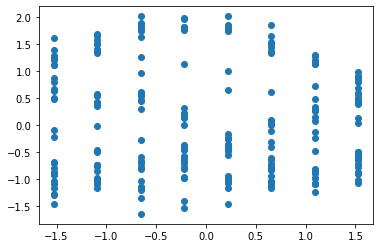

In [9]:
plt.scatter(d1[["time"]], d1[["feature1"]])

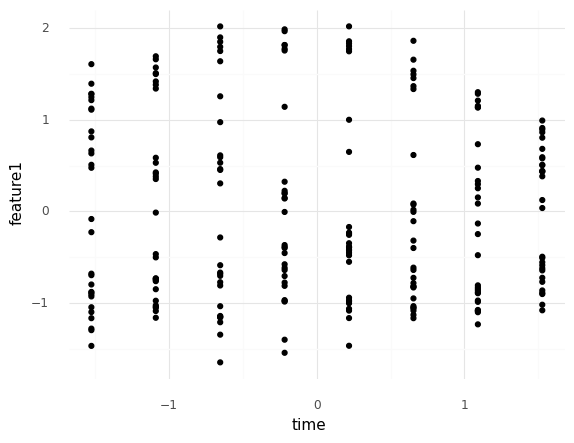

<ggplot: (121447902669)>

In [8]:
d1 = pd.read_csv("datasets/generated_1d_data.csv")

d1.head()
z = StandardScaler()
d1[["time", "feature1"]] = z.fit_transform(d1[["time", "feature1"]])

ggplot(d1, aes(x = "time", y = "feature1")) + geom_point() + theme_minimal()

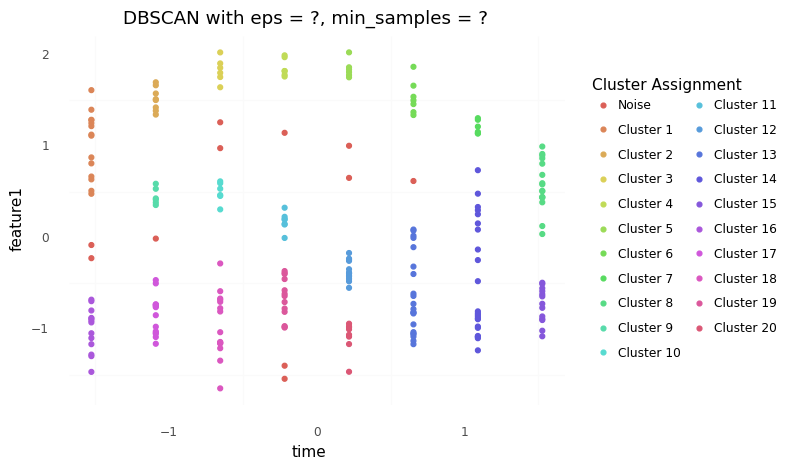

<ggplot: (121448093949)>

In [10]:
test_db1 = DBSCAN(eps = 0.35, min_samples = 3).fit(d1[["time", "feature1"]])

labsList = ["Noise"]
labsList = labsList + ["Cluster " + str(i) for i in range(1, len(set(test_db1.labels_)))]

d1["assignments"] = test_db1.labels_

(ggplot(d1, aes(x = "time", y = "feature1", color = "factor(assignments)")) + geom_point() + theme_minimal() +
    scale_color_discrete(name = "Cluster Assignment",
                        labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "DBSCAN with eps = ?, min_samples = ? "))

In [11]:
d1_clustered = d1.loc[(d1.assignments >= 0)]

silhouette_score(d1_clustered[["time", "feature1"]], d1_clustered[["assignments"]])

0.4494636684596996

In [12]:
rater = CLOSE(d1[['object_id', 'time', 'assignments', 'feature1']], 'mae', 2, jaccard=True, weighting=True, exploitation_term=True)
print(rater.rate_clustering())
rater = CLOSE(d1[['object_id', 'time', 'assignments', 'feature1']], 'exploit', 2, jaccard=True, weighting=True)
print(rater.rate_time_clustering())

0.4361032337356829
0.4837081210861121


In [13]:
#Nicht Vorhandene Werte von Zeitreihen simulieren
sample_df = d1.sample(frac =.8)

#defekte (None) Werte von Zeitreihe simulieren
#dfupdate = sample_df.sample(frac = .2)
#dfupdate.feature1 = None
#sample_df.update(dfupdate)

In [14]:
#Spalten die gescaled wurden wieder zurückscalen
d1[["time", "feature1"]] = z.inverse_transform(d1[["time", "feature1"]])
sample_df[["time", "feature1"]] = z.inverse_transform(sample_df[["time", "feature1"]])

In [15]:
#rausfiltern der komplett verlorenen Zeilen *(id, time)
missing_rows = get_missing_rows(sample_df, "object_id", "time")

In [111]:
def get_missing_rows(dataframe, df_id_name, df_time_name):  #df_feature_name
    id_list = list(set(dataframe[df_id_name]))
    time_list = list(set(dataframe[df_time_name]))
    result = []

    for id_elem in id_list:
        for time_elem in time_list:
            if dataframe[(dataframe[df_id_name] == id_elem) & (dataframe[df_time_name] == time_elem)].empty: # | dataframe[(dataframe[df_feature_name] == None)]
                result.append([id_elem, time_elem])
    
    return result  

In [112]:
def id_assignments_list(dataframe, missing_id_list, df_id_name, df_cluster_name):
    id_assignment_list = []
    needed_assignments = []

    for id_elem in missing_id_list:
        needed_assignments = list(set(getattr(dataframe[dataframe[df_id_name] == id_elem], df_cluster_name)))
        if -1 in needed_assignments:
            needed_assignments.remove(-1)
        id_assignment_list.append([id_elem, list(needed_assignments)])
        needed_assignments.clear()

    return id_assignment_list

In [113]:
def id_mfcm_list(missing_id_list, id_assignment_list):
    most_frequent_cluster_member = []
    mfcm_ids = []
    current_count = 0
    biggest_count = 0

    for missing_id_elem in missing_id_list:
        for id_elem, assignments_elem in id_assignment_list:
            if missing_id_elem != id_elem:
                current_count = len(set(id_assignment_list[missing_id_list.index(missing_id_elem)][1]).intersection(assignments_elem))
                if current_count == biggest_count:
                    mfcm_ids.append(id_elem)
                if current_count > biggest_count:
                    biggest_count = current_count
                    mfcm_ids.clear()
                    mfcm_ids.append(id_elem)
        most_frequent_cluster_member.append([missing_id_elem, list(mfcm_ids)])
        mfcm_ids.clear()
        biggest_count = 0

    return most_frequent_cluster_member

In [114]:
def most_frequent_cluster_member(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_id_list = sorted(list(set([item[0] for item in missing_rows])))
    id_assignment_list = id_assignments_list(dataframe, missing_id_list, df_id_name, df_cluster_name)
    mfcm = id_mfcm_list(missing_id_list, id_assignment_list)
    mfcm_id_list = [item[0] for item in mfcm]
    middle = []
    result = []
    
    for missing_id_elem, missing_time_elem in missing_rows:
        for cluster_member in mfcm[mfcm_id_list.index(missing_id_elem)][1]:
            if getattr(dataframe[(dataframe[df_id_name] == cluster_member) & (dataframe[df_time_name] == missing_time_elem)], df_feature_name).values:
                middle.append(getattr(dataframe[(dataframe[df_id_name] == cluster_member) & (dataframe[df_time_name] == missing_time_elem)], df_feature_name).values)
        if middle:
            result.append([missing_id_elem, missing_time_elem, list(statistics.median(middle))])
            middle.clear()
        else:
            result.append([missing_id_elem, missing_time_elem, ["-----------------"]])
        
    return result

In [115]:
def pre_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name):
    df_times = list(set(getattr(dataframe, df_time_name)))
    df_times.reverse()
    index = df_times.index(time)
    pre_features = []
    
    for id_elem in list_of_ids:
        for time_elem in df_times[index+1:]:
            row = dataframe[(dataframe[df_id_name] == id_elem) & (dataframe[df_time_name] == time_elem)]
            if not row.empty:
                if not getattr(row, df_feature_name).values is None:
                    pre_features.append(getattr(row, df_feature_name).values)
                    break
    
    return pre_features

In [116]:
def post_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name):
    df_times = list(set(getattr(dataframe, df_time_name)))
    index = df_times.index(time)
    post_features = []
    
    for id_elem in list_of_ids:
        for time_elem in df_times[index+1:]:
            row = dataframe[(dataframe[df_id_name] == id_elem) & (dataframe[df_time_name] == time_elem)]
            if not row.empty:
                if not getattr(row, df_feature_name).values is None:
                    post_features.append(getattr(row, df_feature_name).values)
                    break
    
    return post_features

In [117]:
def pre_and_post_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name):
    result = []
    
    result.extend(pre_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name))
    result.extend(post_features(dataframe, list_of_ids, time, df_id_name, df_time_name, df_feature_name))

    return result

In [118]:
def pre_and_post_clustering_analysis(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_id_list = sorted(list(set([item[0] for item in missing_rows])))
    id_assignment_list = id_assignments_list(dataframe, missing_id_list, df_id_name, df_cluster_name)
    mfcm = id_mfcm_list(missing_id_list, id_assignment_list)
    result = []
    
    for id_elem, time_elem in missing_rows:
        for index in range(len(mfcm)):
            if id_elem == mfcm[index][0]:
                result.append([id_elem, time_elem, statistics.median(pre_and_post_features(dataframe, list(flatten(mfcm[index])), time_elem, df_id_name, df_time_name, df_feature_name)).tolist()])
    
    return result
            

In [119]:
def median_of_all(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_time_list = sorted(list(set([item[1] for item in missing_rows])))
    medians = median_of_clusterings(dataframe, missing_time_list, df_time_name, df_feature_name, df_cluster_name)
    median_index_list = [item[0] for item in medians]
    result = []
    
    for id_elem, time_elem in missing_rows:
        result.append([id_elem, time_elem, medians[median_index_list.index(time_elem)][1]])
    
    return result

In [120]:
def median_of_clusterings_test(dataframe, df_time_name, df_feature_name, df_cluster_name):
    middle = []
    result = []
    assignments_list = list(set(getattr(dataframe, df_cluster_name).values))
    
    for cluster_elem in assignments_list:
        if cluster_elem != -1:
            for feature_elem in list(set(getattr(dataframe[dataframe[df_cluster_name] == cluster_elem], df_feature_name).values)):
                if feature_elem != None:
                    middle.append(feature_elem)
            result.append([cluster_elem, statistics.median(middle)])
            middle.clear()
   
    return result

In [121]:
def median_of_all_test(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_id_list = sorted(list(set([item[0] for item in missing_rows])))
    id_assignment_list = id_assignments_list(dataframe, missing_id_list, df_id_name, df_cluster_name)
    id_assignment_index_list = [item[0] for item in id_assignment_list]
    cluster_median_list = median_of_clusterings_test(dataframe, df_time_name, df_feature_name, df_cluster_name)
    cluster_median_index_list = [item[0] for item in cluster_median_list]
    middle = []
    result = []
    
    for missing_id_elem, missing_time_elem in missing_rows:
        for assignment in id_assignment_list[id_assignment_index_list.index(missing_id_elem)][1]:
            middle.append(cluster_median_list[cluster_median_index_list.index(assignment)][1])
        result.append([missing_id_elem, missing_time_elem, statistics.median(middle)])
        middle.clear()
    
    return result

In [122]:
def median_of_clusterings(dataframe, missing_time_list, df_time_name, df_feature_name, df_cluster_name):
    median = []
    median_of_medians = []
    
    for missing_time_elem in missing_time_list:
            assignments = list(set(getattr(dataframe[(dataframe[df_time_name] == missing_time_elem)], df_cluster_name)))
            if -1 in assignments:
                assignments.remove(-1)
            for assign_elem in assignments:
                median.append(statistics.median(getattr(dataframe[(dataframe[df_time_name] == missing_time_elem) & (dataframe[df_cluster_name] == assign_elem)], df_feature_name)))
            median_of_medians.append([missing_time_elem, statistics.median(median)])
            median.clear()

    return median_of_medians

In [123]:
def mean_of_all(dataframe, df_id_name, df_time_name, df_feature_name, df_cluster_name):
    missing_rows = get_missing_rows(dataframe, df_id_name, df_time_name)
    missing_time_list = sorted(list(set([item[1] for item in missing_rows])))
    means = mean_of_clusterings(dataframe, missing_time_list, df_time_name, df_feature_name, df_cluster_name)
    mean_index_list = [item[0] for item in means]
    result = []
    
    for id_elem, time_elem in missing_rows:
        result.append([id_elem, time_elem, means[mean_index_list.index(time_elem)][1]])
    
    return result

In [124]:
def mean_of_clusterings(dataframe, missing_time_list, df_time_name, df_feature_name, df_cluster_name):
    mean = []
    mean_of_means = []
    
    for missing_time_elem in missing_time_list:
            assignments = list(set(getattr(dataframe[(dataframe[df_time_name] == missing_time_elem)], df_cluster_name)))
            if -1 in assignments:
                assignments.remove(-1)
            for assign_elem in assignments:
                mean.append(statistics.mean(getattr(dataframe[(dataframe[df_time_name] == missing_time_elem) & (dataframe[df_cluster_name] == assign_elem)], df_feature_name)))
            mean_of_means.append([missing_time_elem, statistics.mean(mean)])
            mean.clear()

    return mean_of_means

In [106]:
sample_df[sample_df["object_id"] == 1]

,object_id,time,feature1,assignments
18,1,4.0,0.990274,3
36,1,7.0,0.771230,6
30,1,6.0,0.863845,5
12,1,3.0,0.955281,2
24,1,5.0,0.950846,4


In [107]:
mean_of_all(sample_df, "object_id", "time", "feature1", "assignments")

[[1, 1.0, 0.47497589575666055],
 [1, 2.0, 0.5748459609007617],
 [1, 8.0, 0.4649569368496652],
 [2, 6.0, 0.6034704513697413],
 [3, 2.0, 0.5748459609007617],
 [5, 1.0, 0.47497589575666055],
 [5, 4.0, 0.6036539851180176],
 [7, 2.0, 0.5748459609007617],
 [8, 4.0, 0.6036539851180176],
 [8, 8.0, 0.4649569368496652],
 [9, 1.0, 0.47497589575666055],
 [9, 4.0, 0.6036539851180176],
 [9, 7.0, 0.5633954922608123],
 [10, 6.0, 0.6034704513697413],
 [10, 7.0, 0.5633954922608123],
 [11, 1.0, 0.47497589575666055],
 [11, 5.0, 0.5120099238537414],
 [11, 6.0, 0.6034704513697413],
 [11, 8.0, 0.4649569368496652],
 [12, 6.0, 0.6034704513697413],
 [14, 2.0, 0.5748459609007617],
 [14, 4.0, 0.6036539851180176],
 [14, 7.0, 0.5633954922608123],
 [15, 1.0, 0.47497589575666055],
 [15, 7.0, 0.5633954922608123],
 [16, 7.0, 0.5633954922608123],
 [16, 8.0, 0.4649569368496652],
 [17, 2.0, 0.5748459609007617],
 [18, 5.0, 0.5120099238537414],
 [19, 2.0, 0.5748459609007617],
 [19, 7.0, 0.5633954922608123],
 [20, 5.0, 0.512

In [101]:
median_of_all(sample_df, "object_id", "time", "feature1", "assignments")

[[1, 1.0, 0.5054328763582907],
 [1, 2.0, 0.5850901578362111],
 [1, 8.0, 0.46554934526924024],
 [2, 6.0, 0.5866847161634995],
 [3, 2.0, 0.5850901578362111],
 [5, 1.0, 0.5054328763582907],
 [5, 4.0, 0.530831672838457],
 [7, 2.0, 0.5850901578362111],
 [8, 4.0, 0.530831672838457],
 [8, 8.0, 0.46554934526924024],
 [9, 1.0, 0.5054328763582907],
 [9, 4.0, 0.530831672838457],
 [9, 7.0, 0.5242975542212192],
 [10, 6.0, 0.5866847161634995],
 [10, 7.0, 0.5242975542212192],
 [11, 1.0, 0.5054328763582907],
 [11, 5.0, 0.3788666677042189],
 [11, 6.0, 0.5866847161634995],
 [11, 8.0, 0.46554934526924024],
 [12, 6.0, 0.5866847161634995],
 [14, 2.0, 0.5850901578362111],
 [14, 4.0, 0.530831672838457],
 [14, 7.0, 0.5242975542212192],
 [15, 1.0, 0.5054328763582907],
 [15, 7.0, 0.5242975542212192],
 [16, 7.0, 0.5242975542212192],
 [16, 8.0, 0.46554934526924024],
 [17, 2.0, 0.5850901578362111],
 [18, 5.0, 0.3788666677042189],
 [19, 2.0, 0.5850901578362111],
 [19, 7.0, 0.5242975542212192],
 [20, 5.0, 0.37886666

In [ ]:
columns = list(sample_df.columns)

for row in sample_df.itertuples():
    print(getattr(row, random.choice(columns)))

In [ ]:
sample_df

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_df.sort_values(by=["object_id", "time"]))

In [ ]:
id_is_1 = d1["object_id"]==1 #ist ein boolean
d1_id_1 = d1[id_is_1]
d1_id_1

In [ ]:
sample_df[(sample_df["object_id"] == 1) & (sample_df["time"] == 1)] # sehr wichtig für die anpassung der methoden später!!!!!!